In [1]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import numpy as np
import cv2
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('..'))

# ----------- local imports ----------- 
from constants import BASE_DIR

In [2]:
model = YOLO("yolo11n-seg.pt")  

In [3]:
image_path = BASE_DIR / "datasets/celebrities/mo_salah/cropped/1.jpg"
input_image = np.array(Image.open(image_path).convert("RGB"))
output_image = None
results = model(image_path)[0]


person_masks = []
for i, cls in enumerate(results.boxes.cls):
    if cls == 0:
        mask = results.masks.data[i].cpu().numpy()
        person_masks.append(mask)

if len(person_masks) == 0:
    output_image = input_image
else:
    areas = [np.sum(mask) for mask in person_masks]
    largest_mask = person_masks[np.argmax(areas)]
    largest_mask_resized = cv2.resize(largest_mask.astype(np.uint8), input_image.shape[:2], interpolation=cv2.INTER_NEAREST)
    output_image = input_image * largest_mask_resized[:, :, np.newaxis]


image 1/1 /home/aliaagheis/projects/Ad-Image-Generation/datasets/celebrities/mo_salah/cropped/1.jpg: 640x640 1 person, 1 cell phone, 13.3ms
Speed: 3.9ms preprocess, 13.3ms inference, 195.3ms postprocess per image at shape (1, 3, 640, 640)


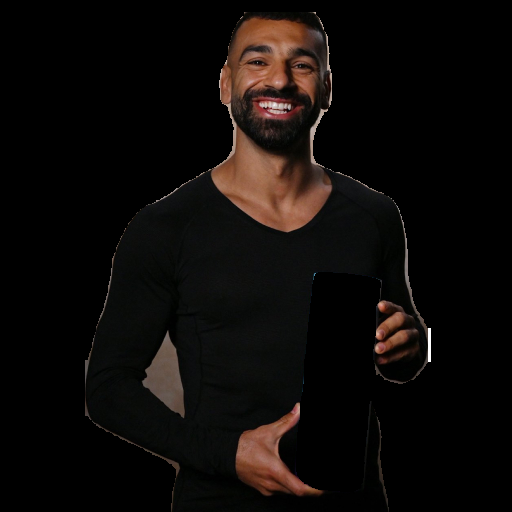

In [4]:
Image.fromarray(output_image)

# rembg

In [5]:
from rembg import remove

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 236GB/s]


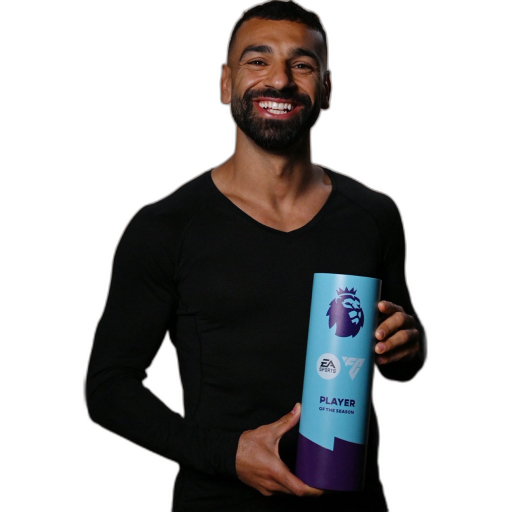

In [7]:
remove(Image.open(image_path))